In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

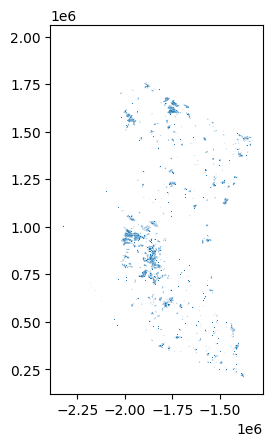

In [5]:
fire = gpd.read_file('../../processing/fire_polygon/fire_polygon.shp')
fire.plot()

<Axes: >

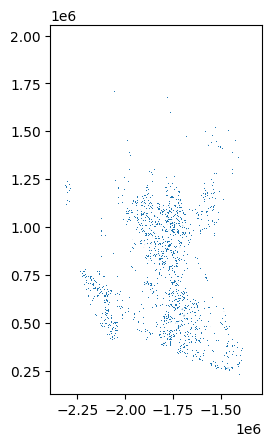

In [4]:
harvest = gpd.read_file('../../processing/harvest_polygon/harvest_polygon.shp')
harvest.plot()

In [8]:
harvest.crs
harvest.geometry.area.sum()

np.float64(34124353200.0)

In [9]:
harvest.geometry = harvest.geometry.to_crs('EPSG:9822')
harvest.geometry.area.sum()

np.float64(36210597806.80662)

In [11]:
fire.geometry = fire.geometry.to_crs('EPSG:9822')
fire.geometry.area.sum()

np.float64(30477854643.38997)

In [10]:
harvest_reprojected = gpd.read_file('../../processing/harvest_reprojected/harvest_reprojected.shp')
harvest_reprojected.geometry.area.sum()

np.float64(36210597806.80662)

In [14]:
fire_reprojected = gpd.read_file('../../processing/fire_reprojected/fire_reprojected.shp')
fire_reprojected.geometry.area.sum()

np.float64(30477854643.38997)

count    1.137334e+06
mean     3.183814e+04
std      1.342757e+05
min      9.065606e+02
25%      9.665274e+02
50%      1.914712e+03
75%      8.954592e+03
max      3.585121e+07
dtype: float64

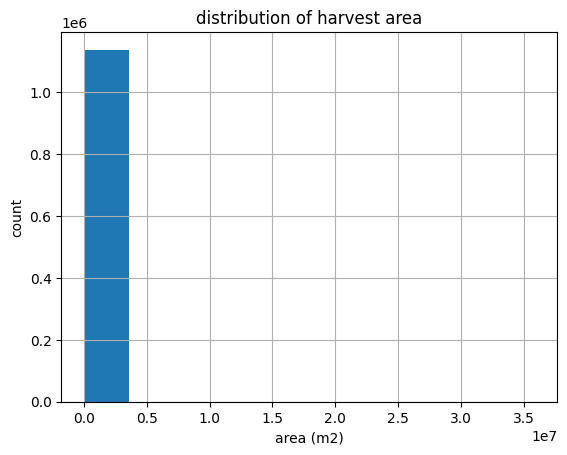

In [ ]:

harvest_reprojected.geometry.area.hist(label='distribution of harvest area')
plt.title('distribution of harvest area')
plt.xlabel('area (m2)')
plt.ylabel('count')
harvest_reprojected.geometry.area.describe()

Text(0, 0.5, 'count')

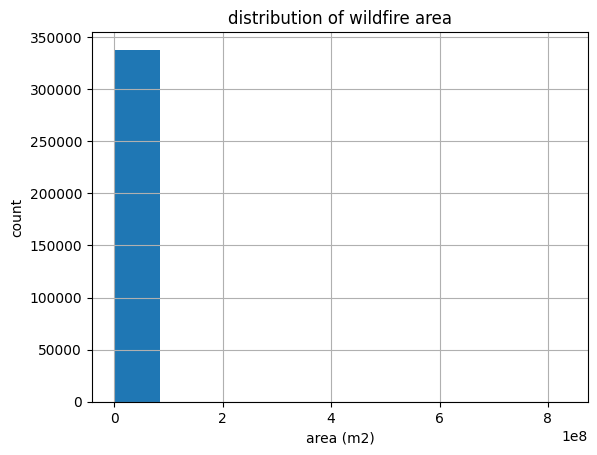

In [29]:
fire_reprojected.geometry.area.describe()
fire_reprojected.geometry.area.hist()
plt.title('distribution of wildfire area')
plt.xlabel('area (m2)')
plt.ylabel('count')

In [44]:
fire_filtered = fire_reprojected[fire_reprojected.geometry.area > 10000]
harvest_filtered = harvest_reprojected[harvest_reprojected.geometry.area > 10000]

count    2.721570e+05
mean     1.262250e+05
std      2.522354e+05
min      1.000029e+04
25%      2.022939e+04
50%      4.876743e+04
75%      1.336013e+05
max      3.585121e+07
dtype: float64

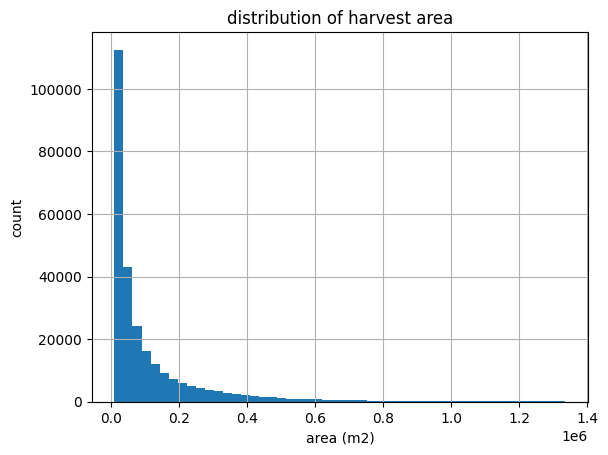

In [45]:
harvest_filtered[harvest_filtered.geometry.area < 1336010].geometry.area.hist(bins=50)
plt.title('distribution of harvest area')
plt.xlabel('area (m2)')
plt.ylabel('count')
harvest_filtered.geometry.area.describe()

count    5.130100e+04
mean     5.818610e+05
std      9.441332e+06
min      1.000014e+04
25%      1.438951e+04
50%      2.384257e+04
75%      5.896241e+04
max      8.322435e+08
dtype: float64

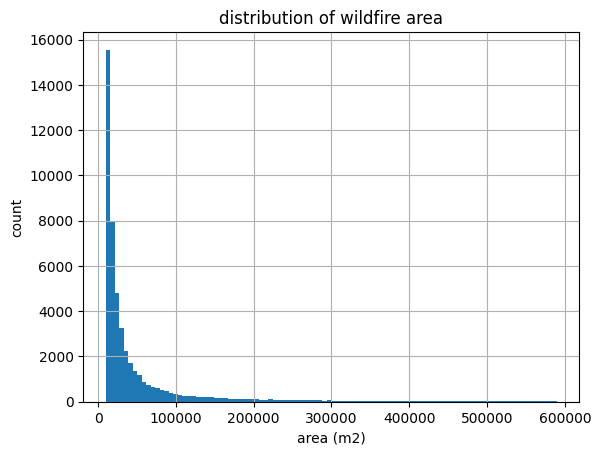

In [47]:
fire_filtered[fire_filtered.geometry.area < 589624].geometry.area.hist(bins=100)
plt.title('distribution of wildfire area')
plt.xlabel('area (m2)')
plt.ylabel('count')
fire_filtered.geometry.area.describe()


In [49]:
simplified15 = harvest_filtered.geometry.simplify(15)
simplified20 = harvest_filtered.geometry.simplify(20)
simplified25 = harvest_filtered.geometry.simplify(25)

In [ ]:
harvest_simplified: gpd.GeoDataFrame = harvest_filtered.copy().reset_index()
harvest_simplified.drop(labels=['index'], axis=1)

KeyError: "['index'] not found in axis"

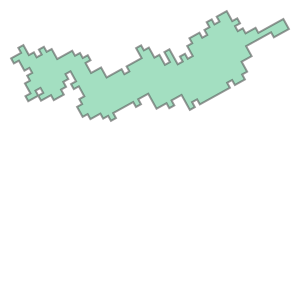

In [55]:
harvest_filtered.geometry[1137310]

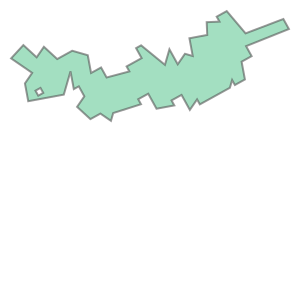

In [57]:
simplified25[1137310]

In [60]:
harvest_filtered.count_coordinates().sum()

np.int64(16900041)

In [58]:
simplified25.count_coordinates().sum()

np.int64(8491253)

<Axes: >

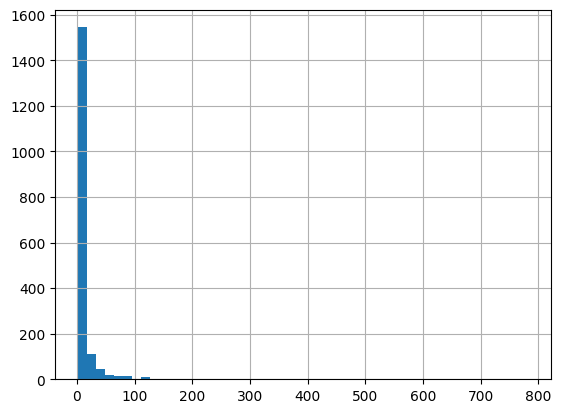

In [66]:
area = simplified.area/10**6
area.hist(bins=50)

<Axes: >

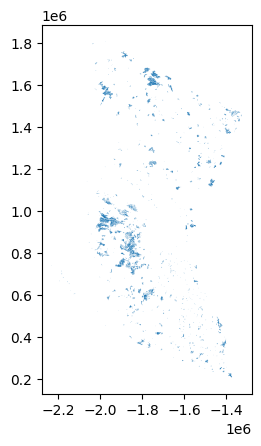

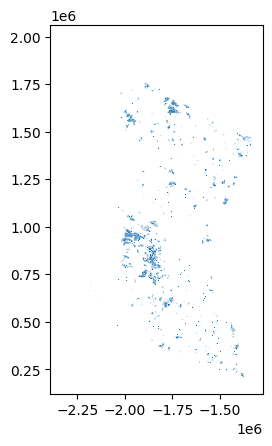

In [68]:
simplified.plot()
fire.plot()

In [70]:
simplified.to_file('./simplified/simplified.shp')